===>spam classification is actually a classic machine learning + rule-based filtering task.
===>Classifying email as spam or ham (not spam) means analyzing its content + metadata and deciding based on patterns that are common in junk mail

In [79]:
import pandas as pd

In [80]:
mails = pd.read_csv('spam.csv', encoding = 'latin-1')
print(f"Dimensionality : {mails.shape}")
mails.head()

Dimensionality : (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [81]:
mails.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [82]:
# Keep only necessary columns and rename for clarity
mails = mails[['v1', 'v2']]
mails.columns = ['label', 'message']

In [83]:
print(f"Label distribution:\n{mails['label'].value_counts()}")

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


In [84]:
mails['label'].unique()

array(['ham', 'spam'], dtype=object)

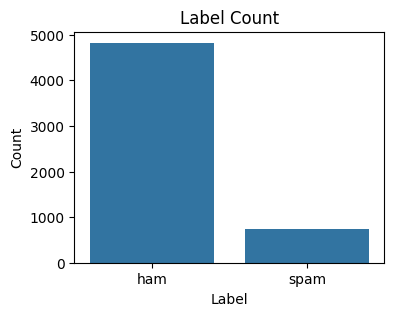

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.countplot(x = 'label', data = mails)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Count')
plt.show()

In [86]:
X = mails['message']
y = mails['label']

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_label = le.fit_transform(y)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,encoded_label, test_size = 0.2, random_state = 42)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase = True,   #convert to lowercase
        stop_words = 'english', #remove stopwords
        ngram_range = (1,2), #unigrams + bigrams
        max_features=10000,  # Limit features to avoid overfitting
        min_df=2,  # Ignore terms that appear in less than 2 documents
        max_df=0.8  
    )),
    ('classifier', MultinomialNB(alpha = 0.1))
])

In [90]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=10000, min_df=2,
                                 ngram_range=(1, 2), stop_words='english')),
                ('classifier', MultinomialNB(alpha=0.1))])

In [91]:
prediction = pipeline.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test,prediction)
print(f"Accuracy : ({acc*100:.2f}%)")
print(f"Classification Report :\n {classification_report(y_test, prediction)}")

Accuracy : (98.03%)
Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [93]:
def predict_message(message, pipeline):
  
    prediction = pipeline.predict([message])[0]
    probabilities = pipeline.predict_proba([message])[0]
    
    # Get confidence for the predicted class
    confidence = probabilities[pipeline.classes_ == prediction][0]
    
    print(f"Message: '{message}'")
    print(f"Prediction: {prediction}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Breakdown: Ham {probabilities[0]:.2%} | Spam {probabilities[1]:.2%}")
    
    return prediction, confidence

# Test messages
test_messages = [
    "Congratulations! You won $1000 cash prize! Call now to claim.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT: Your account has been compromised. Click here to secure.",
    "Ok, see you at the usual place at 6pm",
    "Free entry in 2 a wkly comp to win FA Cup final tkts",
    "Hi mom, can you pick me up from school?",
    "You are a winner! Claim your prize now!"
]

print("=" * 60)
print("SPAM DETECTION RESULTS")
print("=" * 60)

for i, message in enumerate(test_messages, 1):
    print(f"\n{i}. ", end="")
    predict_message(message, pipeline)
    print("-" * 50)

SPAM DETECTION RESULTS

1. Message: 'Congratulations! You won $1000 cash prize! Call now to claim.'
Prediction: 1
Confidence: 100.00%
Breakdown: Ham 0.00% | Spam 100.00%
--------------------------------------------------

2. Message: 'Hey, are we still meeting for lunch tomorrow?'
Prediction: 0
Confidence: 99.97%
Breakdown: Ham 99.97% | Spam 0.03%
--------------------------------------------------

3. Message: 'URGENT: Your account has been compromised. Click here to secure.'
Prediction: 1
Confidence: 71.64%
Breakdown: Ham 28.36% | Spam 71.64%
--------------------------------------------------

4. Message: 'Ok, see you at the usual place at 6pm'
Prediction: 0
Confidence: 99.74%
Breakdown: Ham 99.74% | Spam 0.26%
--------------------------------------------------

5. Message: 'Free entry in 2 a wkly comp to win FA Cup final tkts'
Prediction: 1
Confidence: 100.00%
Breakdown: Ham 0.00% | Spam 100.00%
--------------------------------------------------

6. Message: 'Hi mom, can you pick me 